# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [22]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# make sure charts appear in the notebook:
%matplotlib inline

In [23]:
# Load the data into a DataFrame
# Using the parse dates function to automatically convert dates to DateTime
liquor_data = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv', parse_dates=['Date'])


liquor_data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [24]:
#Removing the 'Volume Sold (Gallons)' column as it is not useful. Hard liquor is measured in Liters.
del liquor_data['Volume Sold (Gallons)']

#Removing the dollar signs from prices columns and converting them to floats
remove_dollars = lambda val: float(val.replace('$',''))
liquor_data['State Bottle Cost'] = liquor_data['State Bottle Cost'].map(remove_dollars)
liquor_data['State Bottle Retail'] = liquor_data['State Bottle Retail'].map(remove_dollars)
liquor_data['Sale (Dollars)'] = liquor_data['Sale (Dollars)'].map(remove_dollars)

# Creating a new column called bulk seller. Bulk seller defined as selling greater then 6 bottles on a given day.
liquor_data['Bulk Seller'] = liquor_data['Bottles Sold'].map(lambda x: 1 if x >= 6 else 0)

# Creating a new column that subtracts the State Bottle Retail from the cost to get the net value per bottle
liquor_data['Net Sale by Bottle'] = liquor_data['State Bottle Retail'] - liquor_data['State Bottle Cost']

# Creating a new
liquor_data['Net Sale Profit'] = liquor_data['Net Sale by Bottle'] * liquor_data['Bottles Sold']
liquor_data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Bulk Seller,Net Sale by Bottle,Net Sale Profit
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,1,2.25,27.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0,6.88,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,1,6.30,151.20
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,1,4.75,28.50
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,1,3.60,43.20


In [27]:
liquor_data.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Bulk Seller,Net Sale by Bottle,Net Sale Profit
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,0.575022,4.902479,43.097436
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690,0.494341,3.523867,128.597325
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.000000,0.000000,0.000000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.000000,2.760000,10.165000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.000000,4.100000,23.520000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,1.000000,5.980000,45.000000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,1.000000,212.500000,12130.800000


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
max(liquor_data['Net Sale Profit'])

12130.800000000001

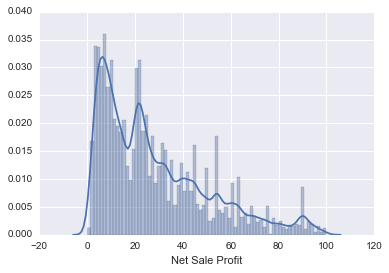

In [29]:
#Histogram of net sales amounts in dollars. Limited it to sales of under $500 to remove some extreme outliers

sns.distplot(liquor_data.ix[liquor_data['Net Sale Profit'] < 100, 'Net Sale Profit'], bins=75)

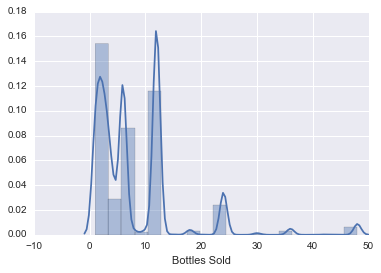

In [8]:
#How can I sand off the extreme edges of this graph

sns.distplot(liquor_data.ix[liquor_data['Bottles Sold'] < 50, 'Bottles Sold'], bins=20)

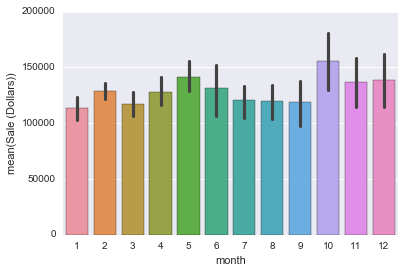

In [9]:
#Prepping data to make a bar graph of liquor sales by month
datesum = liquor_data.groupby('Date').sum()
datesum = pd.DataFrame(datesum)
datesum = datesum.reset_index()

datesum["month"] = datesum["Date"].map(lambda row: row.month)

sns.barplot(x='month', y='Sale (Dollars)', data=datesum)


In [30]:
# Calculating the sum of the net sales by Category
cat_sales_sum = liquor_data.groupby('Category Name')['Net Sale Profit'].sum().order()
cat_sales_sum.head()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Category Name
HIGH PROOF BEER - AMERICAN     95.18
LOW PROOF VODKA               199.50
CORN WHISKIES                 292.34
ANISETTE                      328.58
WHITE CREME DE MENTHE         618.80
Name: Net Sale Profit, dtype: float64

In [31]:
# Calculating the total bottles sold by category
cat_bottles_sum = liquor_data.groupby('Category Name')['Bottles Sold'].sum().order()
cat_bottles_sum.head()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Category Name
HIGH PROOF BEER - AMERICAN      2
CORN WHISKIES                  27
LOW PROOF VODKA                38
AMARETTO - IMPORTED            48
JAPANESE WHISKY               130
Name: Bottles Sold, dtype: int64

In [33]:
# Converting the bottles and net sales sum to table and naming the column categories
cat_sales_sum = pd.DataFrame(cat_sales_sum)
cat_sales_sum['Category Name'] = cat_sales_sum.index
cat_bottles_sum = pd.DataFrame(cat_bottles_sum)
cat_bottles_sum['Category Name'] = cat_bottles_sum.index
#Merging the two tables on the Category name.
combo_cat_df = pd.merge(cat_sales_sum, cat_bottles_sum)
#Reordering the table
combo_cat_df = combo_cat_df[['Category Name', 'Net Sale Profit', 'Bottles Sold']]
combo_cat_df.head()

,Category Name,Net Sale Profit,Bottles Sold
0,HIGH PROOF BEER - AMERICAN,95.18,2
1,LOW PROOF VODKA,199.50,38
2,CORN WHISKIES,292.34,27
3,ANISETTE,328.58,138
4,WHITE CREME DE MENTHE,618.80,260


In [34]:
combo_cat_df.describe()

,Net Sale Profit,Bottles Sold
count,7.100000e+01,71.000000
mean,1.638885e+05,37581.042254
std,2.944382e+05,77897.654417
min,9.518000e+01,2.000000
25%,4.544060e+03,1298.000000
50%,2.255094e+04,7773.000000
75%,2.019233e+05,45203.000000
max,1.486014e+06,517504.000000


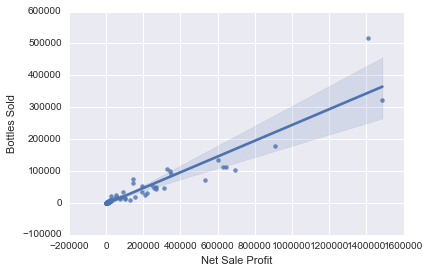

In [35]:
# Creating a regplot to to show the correlation between Net Sale Profit and bottles sold
sns.regplot(x='Net Sale Profit', y='Bottles Sold', data=combo_cat_df, truncate=True)

In [21]:
# creating a new table to show the mean values of of the new 
catmean= liquor_data.groupby('Category Name').mean()
catmean=catmean.reset_index()
catmean.head()

,Category Name,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Bulk Seller,Net Sales
0,100 PROOF VODKA,3741.157385,58.963939,1031100.0,311.217010,37364.098668,1116.979419,5.839283,8.763444,10.159201,83.108677,10.384219,0.795400,2.924162
1,AMARETTO - IMPORTED,2253.333333,60.333333,1082010.0,497.000000,902536.000000,750.000000,31.130000,46.700000,16.000000,747.200000,12.000000,1.000000,15.570000
2,AMERICAN ALCOHOL,3483.267016,55.847902,1101100.0,415.844677,42702.233857,750.000000,8.860593,13.291239,10.075044,133.775689,7.556283,0.682373,4.430646
3,AMERICAN AMARETTO,3388.643388,55.032836,1081010.0,367.935364,76491.280832,930.014859,4.529554,6.796538,7.801634,49.947623,7.204532,0.562407,2.266984
4,AMERICAN COCKTAILS,3350.641507,57.212117,1071100.0,270.023669,59960.381873,1562.465724,7.176344,10.811873,7.692596,82.492849,11.968202,0.735315,3.635529


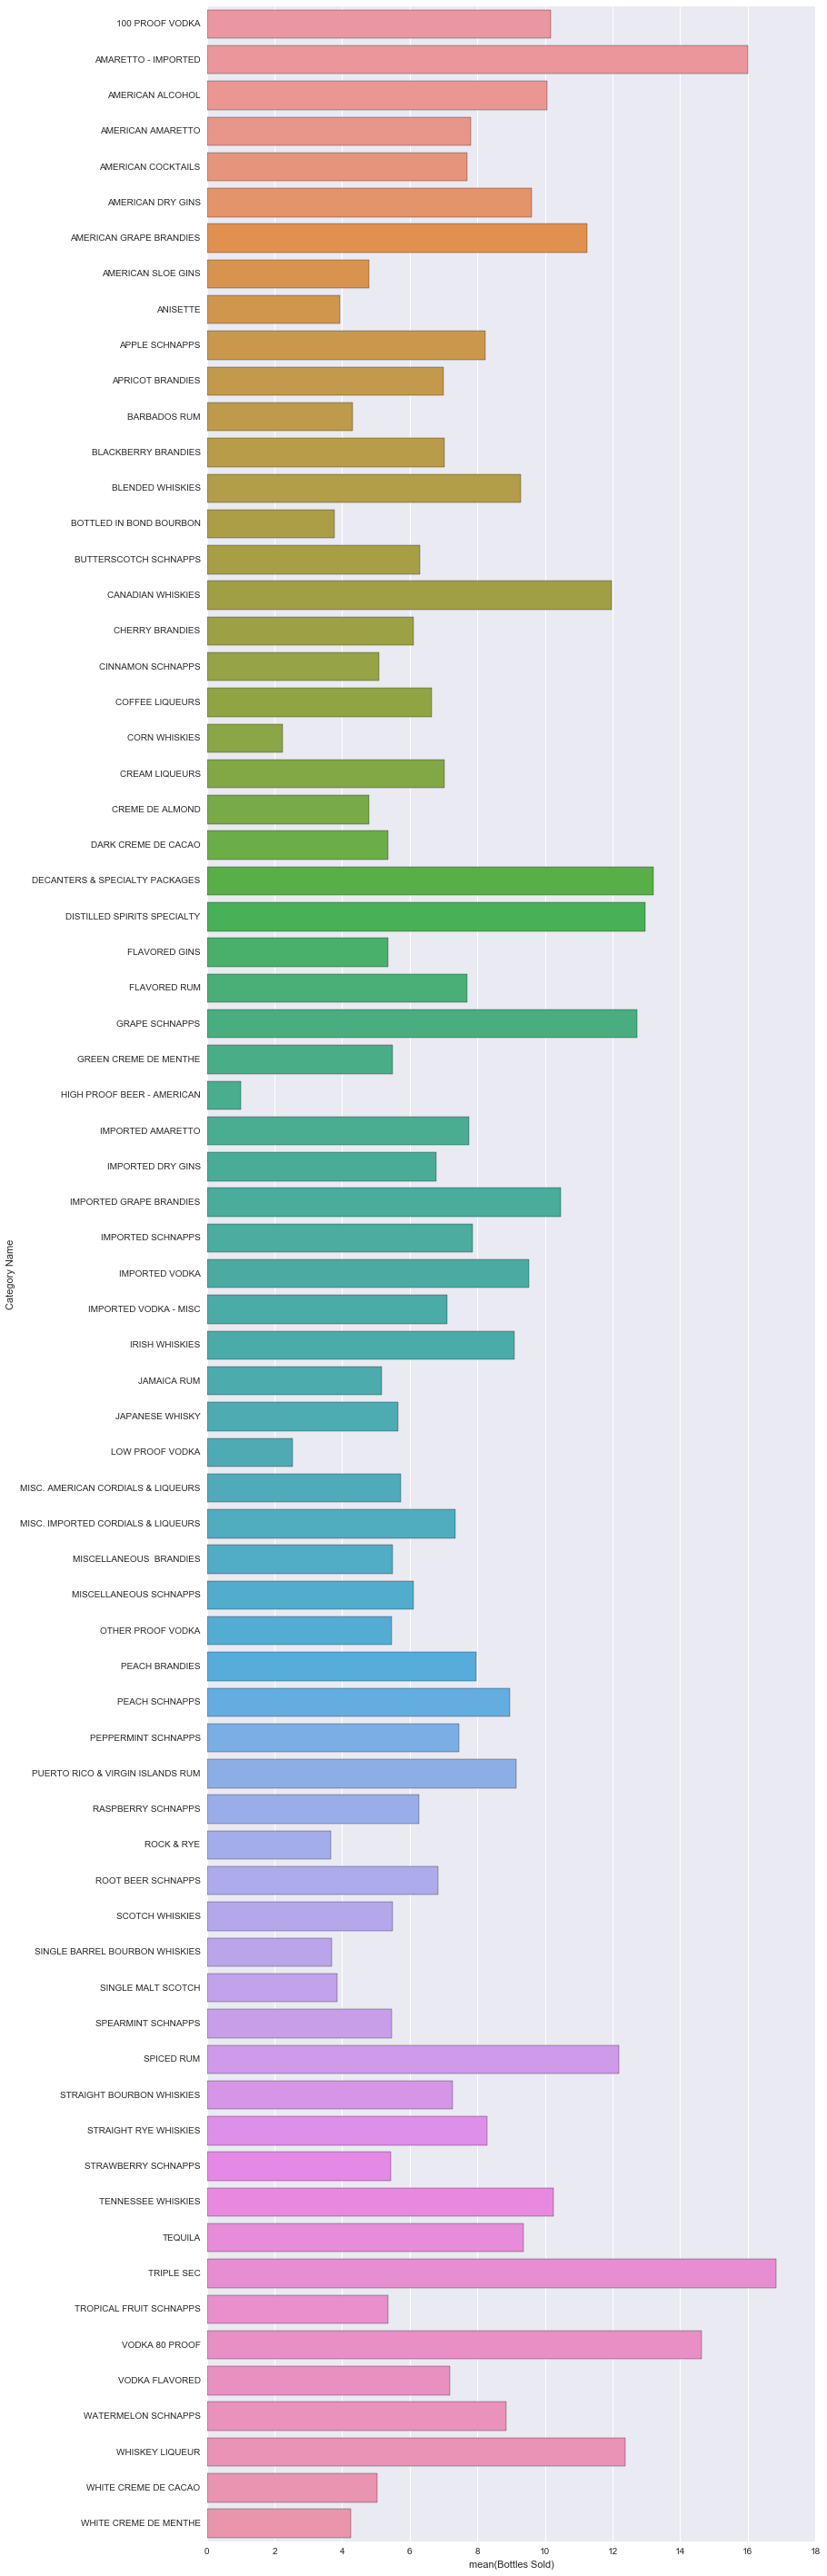

In [16]:
#Making a bar blot to show the average bottles sold per item.

plt.figure(figsize=(12,50))
sns.barplot(x='Bottles Sold', y='Category Name', data=catmean)

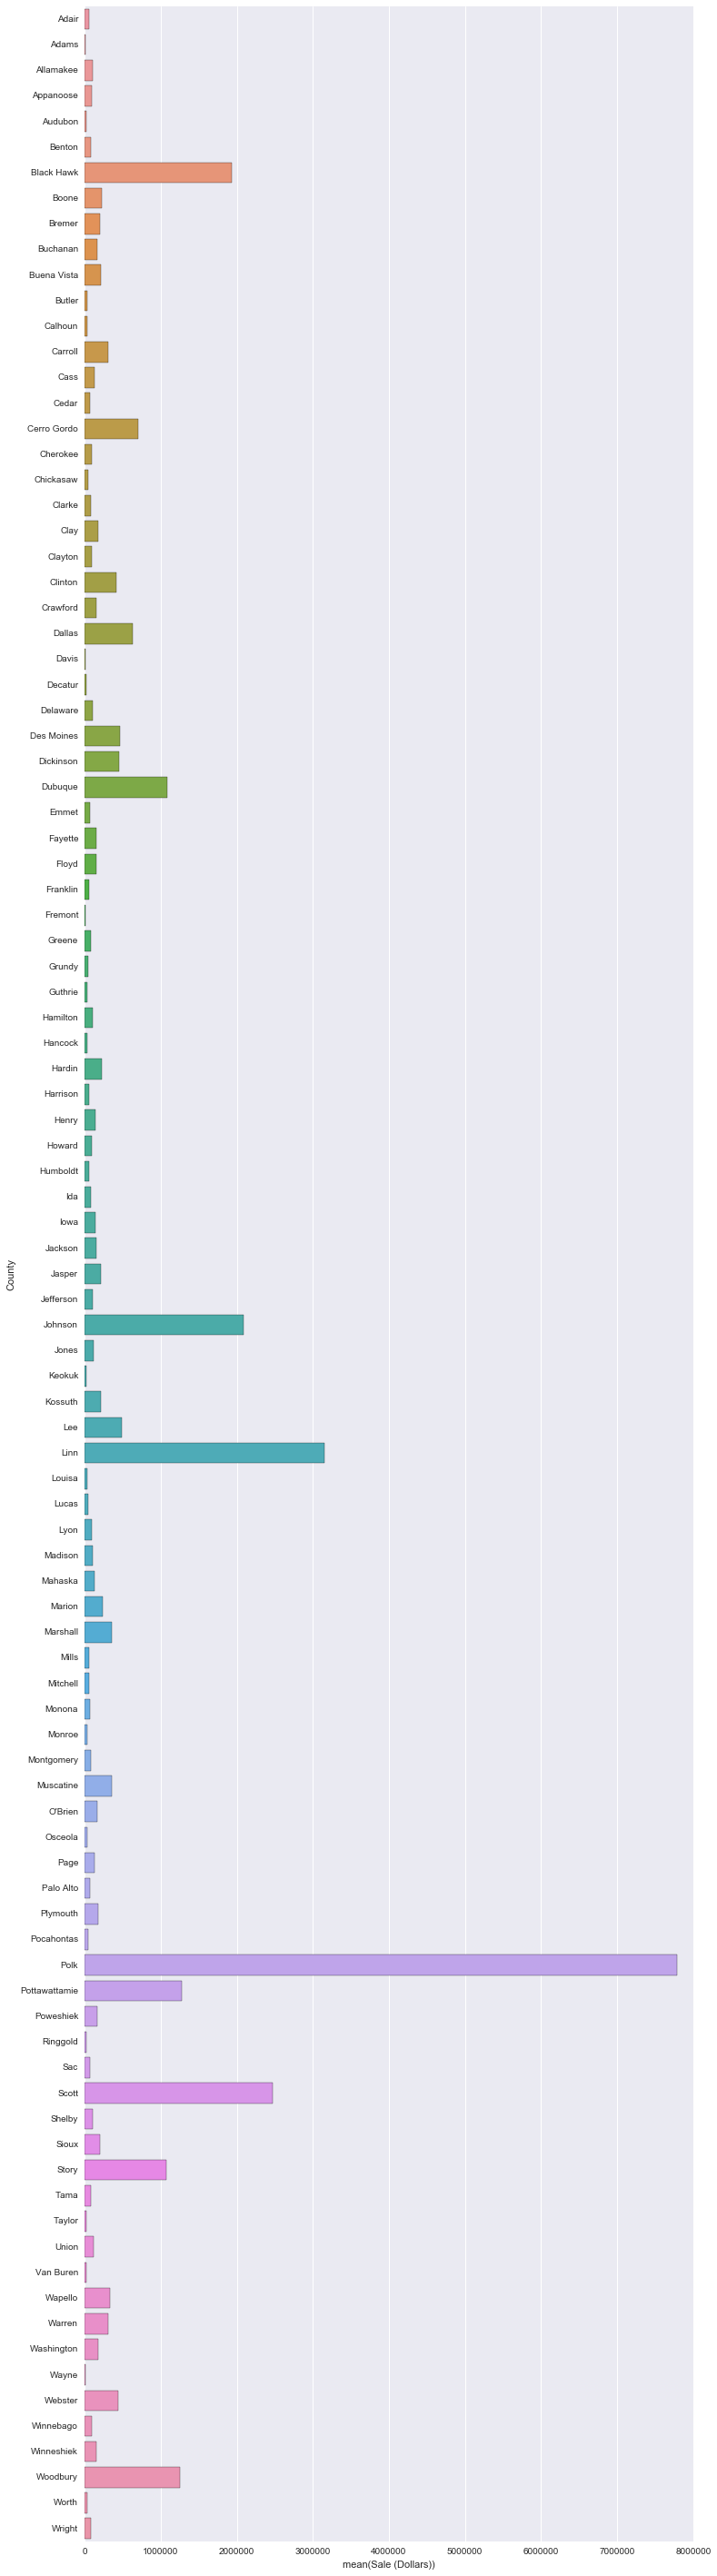

In [17]:
# Make a new table with the sum of sales by county to make a bar chart of it.
countysum = liquor_data.groupby('County').sum()
countysum = countysum.reset_index()
plt.figure(figsize=(12,50))
sns.barplot(x='Sale (Dollars)', y='County', data=countysum)

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [43]:
liquor_data.corr()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Bulk Seller,Net Sale by Bottle,Net Sale Profit
Store Number,1.000000,0.007510,-0.012111,-0.004533,-0.026386,-0.063475,-0.071382,-0.071520,0.014422,-0.017941,-0.017696,0.015097,-0.071780,-0.017885
County Number,0.007510,1.000000,-0.006336,0.001746,0.006810,-0.027694,0.012186,0.012113,0.018945,0.019851,0.010199,0.032105,0.011963,0.019623
Category,-0.012111,-0.006336,1.000000,0.091920,0.116385,-0.009294,-0.013358,-0.013545,-0.000208,0.006382,-0.004375,-0.018247,-0.013915,0.006023
Vendor Number,-0.004533,0.001746,0.091920,1.000000,0.136120,0.024561,0.003477,0.003085,-0.002116,-0.012277,-0.007432,0.006334,0.002301,-0.012712
Item Number,-0.026386,0.006810,0.116385,0.136120,1.000000,-0.057282,0.097879,0.097612,-0.004766,0.002987,-0.009555,-0.040178,0.097055,0.002628
Bottle Volume (ml),-0.063475,-0.027694,-0.009294,0.024561,-0.057282,1.000000,0.312841,0.313819,-0.012476,0.082446,0.156258,0.223272,0.315698,0.082870
State Bottle Cost,-0.071382,0.012186,-0.013358,0.003477,0.097879,0.312841,1.000000,0.999960,-0.062980,0.135931,0.009296,-0.101233,0.999642,0.134862
State Bottle Retail,-0.071520,0.012113,-0.013545,0.003085,0.097612,0.313819,0.999960,1.000000,-0.062831,0.136114,0.009736,-0.100958,0.999841,0.135088
Bottles Sold,0.014422,0.018945,-0.000208,-0.002116,-0.004766,-0.012476,-0.062980,-0.062831,1.000000,0.825446,0.883348,0.270100,-0.062518,0.827046
Sale (Dollars),-0.017941,0.019851,0.006382,-0.012277,0.002987,0.082446,0.135931,0.136114,0.825446,1.000000,0.846420,0.211183,0.136449,0.999800


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [47]:
#Importing Sklearn models

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict

#Creating Linear Regression Variable
linear_regression = LinearRegression()

#Setting Predictor and target values
#My goal is to predict the number of bottles sold using the county, category name and bottle volume as predictors
predictor_mask = ['State Bottle Retail', 'Bottle Volume (ml)']
X = liquor_data[predictor_mask]
y = liquor_data['Bottles Sold']
X_train, x_test, Y_train, y_test = train_test_split(X, y, train_size=.7)

In [48]:
model = linear_regression.fit(X_train, Y_train)
predictions = linear_regression.predict(x_test)

In [42]:
# # Iporting  R stuff that didn't quite help like I hoped it would
# import rpy2.robjects as robjects
# rread = robjects.r('read.csv')
# rhead = robjects.r('head')
# rlibrary = robjects.r('library')
# rlibrary('data.table')
# # rlibrary('data.frame') apparently not a thing
# rdatatable = robjects.r('data.table')
# # rdataframe = robjects.r('data.frame')
# r_liquor_data = rread('Iowa_Liquor_sales_sample_10pct.csv')
# r_liquor_data = rdatatable(r_liquor_data)
# r_liquor_data

In [ ]:
# rlm = robjects.r('lm')
# rsummary = robjects.r('summary')
# model = rlm('Sale..Dollars. ~ County + Date', data=r_liquor_data)
# rsummary(model)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

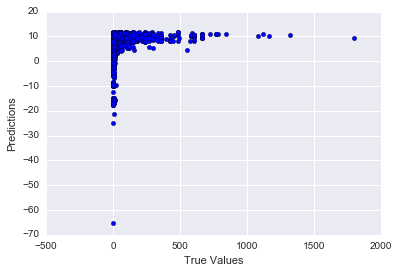

In [50]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.